In [2]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashplayershotlocations
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats, leaguedashteamptshot
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_61342/1659342530.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [26]:
jimmy = find_players_by_full_name('Jayson Tatum')[0]

name = jimmy['full_name'].split(' ')[0]
jimmy_id = jimmy['id']

In [27]:
players_range_heat_win = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(distance_range='By Zone', 
                                                                                        per_mode_detailed='PerGame',
                                                                                        season_type_all_star='Playoffs',
                                                                                        season='2022-23',
                                                                                        outcome_nullable='W',
                                                                                        po_round_nullable=3).get_data_frames()[0]

time.sleep(1)

players_range_heat_loss = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(distance_range='By Zone', 
                                                                                        per_mode_detailed='PerGame',
                                                                                        season_type_all_star='Playoffs',
                                                                                        season='2022-23',
                                                                                        outcome_nullable='L',
                                                                                        po_round_nullable=3).get_data_frames()[0]

time.sleep(1)



In [28]:
players_range_heat_win.head()

SHOT_CATEGORY                                                               
columns       PLAYER_ID   PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   
0                203932  Aaron Gordon  1610612743               DEN  27.0  \
1                201143    Al Horford  1610612738               BOS  36.0   
2               1628389   Bam Adebayo  1610612748               MIA  25.0   
3               1628971   Bruce Brown  1610612743               DEN  26.0   
4               1628997  Caleb Martin  1610612748               MIA  27.0   

SHOT_CATEGORY          Restricted Area             In The Paint (Non-RA)  ...   
columns       NICKNAME             FGM  FGA FG_PCT                   FGM  ...   
0                Aaron             3.5  4.5  0.778                   0.3  ...  \
1                   Al             1.0  1.5  0.667                   0.5  ...   
2                  Bam             3.0  3.3  0.900                   3.0  ...   
3                Bruce             2.8  4.0  0.688                   1.0  ...   
4                Caleb             2.7  2.7  1.000                   1.0  ...   

SHOT_CATEGORY Right Corner 3 Above the Break 3             Backcourt        
columns               FG_PCT               FGM  FGA FG_PCT       FGM  FGA   
0                        0.0               0.5  1.5  0.333       0.0  0.0  \
1                        0.5               0.5  2.5  0.200       0.0  0.0   
2                        0.0               0.0  0.0  0.000       0.0  0.0   
3                        0.5               0.8  1.5  0.500       0.0  0.0   
4                        0.5               2.0  4.0  0.500       0.0  0.0   

SHOT_CATEGORY        Corner 3              
columns       FG_PCT      FGM  FGA FG_PCT  
0                0.0      0.3  1.3  0.200  
1                0.0      1.0  2.0  0.500  
2                0.0      0.0  0.0  0.000  
3                0.0      0.3  1.3  0.200  
4                0.0      1.3  3.0  0.444  

[5 rows x 30 columns]

In [29]:
players_wins = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense='Base',
                                                    per_mode_detailed='PerGame',
                                                    season_type_all_star='Playoffs',
                                                    season='2022-23',
                                                    outcome_nullable='W',
                                                    po_round_nullable=3).get_data_frames()[0]

time.sleep(1)

players_losses = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense='Base',
                                                    per_mode_detailed='PerGame',
                                                    season_type_all_star='Playoffs',
                                                    season='2022-23',
                                                    outcome_nullable='L',
                                                    po_round_nullable=3).get_data_frames()[0]

In [30]:
for column in players_wins.columns:
    print(column)

PLAYER_ID
PLAYER_NAME
NICKNAME
TEAM_ID
TEAM_ABBREVIATION
AGE
GP
W
L
W_PCT
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
NBA_FANTASY_PTS
DD2
TD3
WNBA_FANTASY_PTS
GP_RANK
W_RANK
L_RANK
W_PCT_RANK
MIN_RANK
FGM_RANK
FGA_RANK
FG_PCT_RANK
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RANK
AST_RANK
TOV_RANK
STL_RANK
BLK_RANK
BLKA_RANK
PF_RANK
PFD_RANK
PTS_RANK
PLUS_MINUS_RANK
NBA_FANTASY_PTS_RANK
DD2_RANK
TD3_RANK
WNBA_FANTASY_PTS_RANK


In [31]:
players_wins[players_wins['PLAYER_ID'] == jimmy_id]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
14,1628369,Jayson Tatum,Jayson,1610612738,BOS,25.0,2,2,0,1.0,...,3,17,9,5,3,2,3,3,2,3


In [32]:
for column in players_range_heat_win.columns:
    print(column)

('', 'PLAYER_ID')
('', 'PLAYER_NAME')
('', 'TEAM_ID')
('', 'TEAM_ABBREVIATION')
('', 'AGE')
('', 'NICKNAME')
('Restricted Area', 'FGM')
('Restricted Area', 'FGA')
('Restricted Area', 'FG_PCT')
('In The Paint (Non-RA)', 'FGM')
('In The Paint (Non-RA)', 'FGA')
('In The Paint (Non-RA)', 'FG_PCT')
('Mid-Range', 'FGM')
('Mid-Range', 'FGA')
('Mid-Range', 'FG_PCT')
('Left Corner 3', 'FGM')
('Left Corner 3', 'FGA')
('Left Corner 3', 'FG_PCT')
('Right Corner 3', 'FGM')
('Right Corner 3', 'FGA')
('Right Corner 3', 'FG_PCT')
('Above the Break 3', 'FGM')
('Above the Break 3', 'FGA')
('Above the Break 3', 'FG_PCT')
('Backcourt', 'FGM')
('Backcourt', 'FGA')
('Backcourt', 'FG_PCT')
('Corner 3', 'FGM')
('Corner 3', 'FGA')
('Corner 3', 'FG_PCT')


In [33]:
jimmy_wins = players_range_heat_win[players_range_heat_win['']['PLAYER_ID'] == jimmy_id]

jimmy_losses = players_range_heat_loss[players_range_heat_loss['']['PLAYER_ID'] == jimmy_id]

In [34]:
float(jimmy_wins['Restricted Area']['FGM'])

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_61342/2865581644.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(jimmy_wins['Restricted Area']['FGM'])


4.0

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_61342/3255072908.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  perc = float(jimmy_wins[zone]['FG_PCT'])
/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_61342/3255072908.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  perc = float(jimmy_losses[zone]['FG_PCT'])
/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_61342/3255072908.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  perc = float(jimmy_wins[zone]['FG_PCT'])
/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_61342/3255072908.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futu

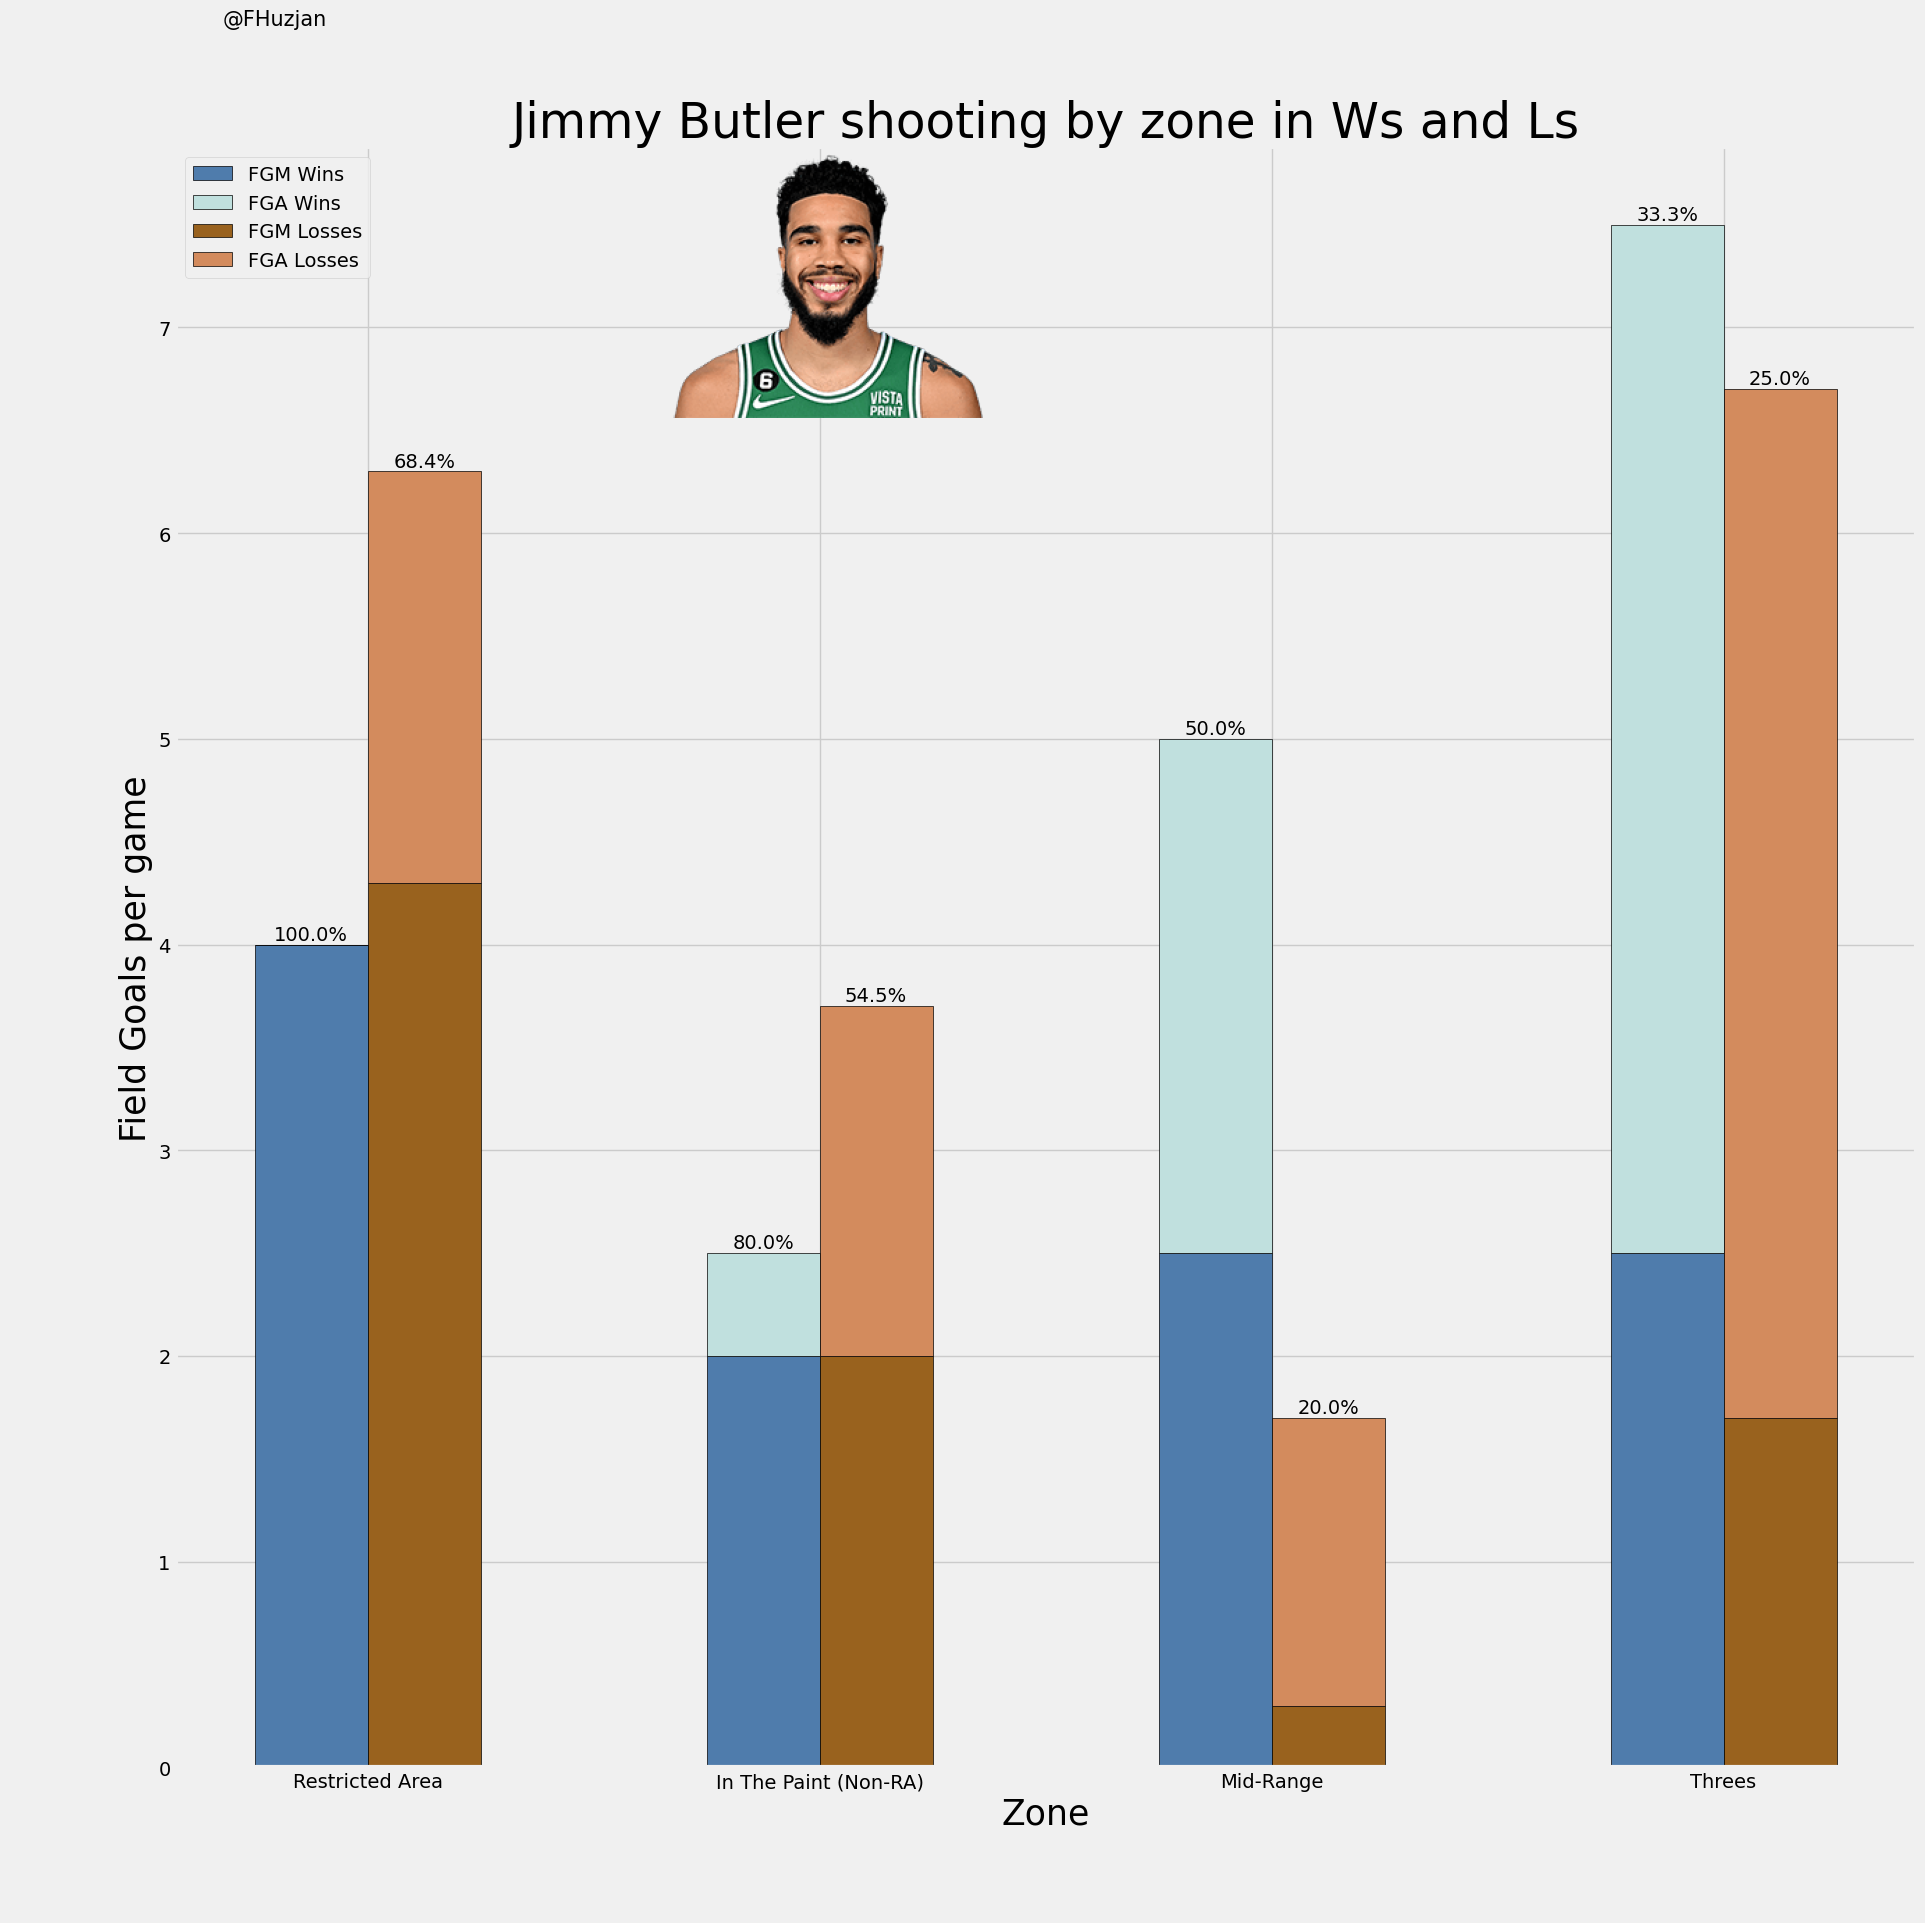

In [36]:
zoom = 1
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

zones = ['Restricted Area', 'In The Paint (Non-RA)', 'Mid-Range']
width = 0.25

fig, ax = plt.subplots(figsize=(20, 20))
# wins_fga_color = '#F3F9E3'
# losses_fga_color = '#AD2831'

# wins_fgm_color = '#628B48'
# losses_fgm_color = '#38040E'

wins_fgm_color = "#4F7CAC"
wins_fga_color = "#C0E0DE"

losses_fgm_color = "#99621E"
losses_fga_color = "#D38B5D"

edge_color = 'black'

for i, zone in enumerate(zones):
    
    if i == 0:
        plt.bar(i, jimmy_wins[zone]['FGM'], width=width, color=wins_fgm_color, label='FGM Wins', edgecolor=edge_color)
        plt.bar(i, jimmy_wins[zone]['FGA'] - jimmy_wins[zone]['FGM'], bottom=jimmy_wins[zone]['FGM'], width=width, color=wins_fga_color, label='FGA Wins', edgecolor=edge_color)
    
        plt.bar(i + 0.25, jimmy_losses[zone]['FGM'], width=width, color=losses_fgm_color, label='FGM Losses', edgecolor=edge_color)
        plt.bar(i + 0.25, jimmy_losses[zone]['FGA'] - jimmy_losses[zone]['FGM'], bottom=jimmy_losses[zone]['FGM'], width=width, color=losses_fga_color, label='FGA Losses', edgecolor=edge_color)
        
    else:
        plt.bar(i, jimmy_wins[zone]['FGM'], width=width, color=wins_fgm_color, edgecolor=edge_color)
        plt.bar(i, jimmy_wins[zone]['FGA'] - jimmy_wins[zone]['FGM'], bottom=jimmy_wins[zone]['FGM'], width=width, color=wins_fga_color, edgecolor=edge_color)
    
        plt.bar(i + 0.25, jimmy_losses[zone]['FGM'], width=width, color=losses_fgm_color, edgecolor=edge_color)
        plt.bar(i + 0.25, jimmy_losses[zone]['FGA'] - jimmy_losses[zone]['FGM'], bottom=jimmy_losses[zone]['FGM'], width=width, color=losses_fga_color, edgecolor=edge_color)
    
    perc = float(jimmy_wins[zone]['FG_PCT'])
    perc = np.round(perc * 100, 2)
    ab_regular = AnnotationBbox(TextArea(f'{perc}%'), (i, jimmy_wins[zone]['FGA'] + 0.05), frameon=False)
    ax.add_artist(ab_regular)

    perc = float(jimmy_losses[zone]['FG_PCT'])
    perc = np.round(perc * 100, 2)
    ab_regular = AnnotationBbox(TextArea(f'{perc}%'), (i + 0.25, jimmy_losses[zone]['FGA'] + 0.05), frameon=False)
    ax.add_artist(ab_regular)
    
jimmy_threes_w_made = players_wins[players_wins['PLAYER_ID'] == jimmy_id]['FG3M']
jimmy_threes_w_att = players_wins[players_wins['PLAYER_ID'] == jimmy_id]['FG3A']
jimmy_threes_w_pct = players_wins[players_wins['PLAYER_ID'] == jimmy_id]['FG3_PCT']

jimmy_threes_l_made = players_losses[players_losses['PLAYER_ID'] == jimmy_id]['FG3M']
jimmy_threes_l_att = players_losses[players_losses['PLAYER_ID'] == jimmy_id]['FG3A']
jimmy_threes_l_pct = players_losses[players_losses['PLAYER_ID'] == jimmy_id]['FG3_PCT']


plt.bar(i + 1, jimmy_threes_w_made, width=width, color=wins_fgm_color, edgecolor=edge_color)
plt.bar(i + 1, jimmy_threes_w_att - jimmy_threes_w_made, bottom=jimmy_threes_w_made, width=width, color=wins_fga_color, edgecolor=edge_color)

plt.bar(i + 1 + 0.25, jimmy_threes_l_made, width=width, color=losses_fgm_color, edgecolor=edge_color)
plt.bar(i + 1 + 0.25, jimmy_threes_l_att - jimmy_threes_l_made, bottom=jimmy_threes_l_made, width=width, color=losses_fga_color, edgecolor=edge_color)


perc = float(jimmy_threes_w_pct)
perc = np.round(perc * 100, 2)
ab_regular = AnnotationBbox(TextArea(f'{perc}%'), (i + 1, jimmy_threes_w_att + 0.05), frameon=False)
ax.add_artist(ab_regular)

perc = float(jimmy_threes_l_pct)
perc = np.round(perc * 100, 2)
ab_regular = AnnotationBbox(TextArea(f'{perc}%'), (i + 1 + 0.25, jimmy_threes_l_att + 0.05), frameon=False)
ax.add_artist(ab_regular)

x_ticks = list(range(0, len(zones) + 1))
x_ticks = [x + 0.125 for x in x_ticks]
ax.set_xticks(x_ticks)

names = zones.append('Threes')

ax.set_xticklabels(zones)
plt.legend()
ax.set_xlabel("Zone", fontsize=25)
ax.set_ylabel("Field Goals per game", fontsize=25)
plt.title('Jimmy Butler shooting by zone in Ws and Ls', fontsize=35)
ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (-0.225, 8.5), frameon=False)
ax.add_artist(ab)
ax.text(x=0.035, y=8.47, ha='right', s='@FHuzjan', size=15)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ab = AnnotationBbox(get_player_img(jimmy_id), (1.15, 7.2), frameon=False)
ax.add_artist(ab)

plt.savefig(f'Graphs/{name}_w_vs_l.png', bbox_inches='tight')

In [13]:
print(players_wins[players_wins['PLAYER_ID'] == jimmy_id]['FGA'])

print(players_losses[players_losses['PLAYER_ID'] == jimmy_id]['FGA'])

14    19.0
Name: FGA, dtype: float64
15    18.3
Name: FGA, dtype: float64
